<a href="https://colab.research.google.com/github/hududed/mlr3mbo-demo/blob/main/batch_mlr3mbo_multi_objective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# In Rstudio or R IDE, these are the R packages needed to be installed - in colab it takes awhile, so using pre-installed libraries
# install.packages(c("mlr3mbo", "mlr3", "mlr3learners", "bbotk", "data.table", "tibble","stringr", "ranger"))
# install.packages(c("ggplot2", "iml", "DALEX", "DALEXtra", "shapper", "simplecolors", "googledrive"))

# Pre-installed libraries
system("pip install --upgrade --no-cache-dir gdown", TRUE)
# system("gdown 1Zd8Et1Tp2PCdBUe6uXr-JruAANIRGgpt", TRUE)
# system("gdown 1QnrfWadCzzU7snoYMqWnGc9APWOVCn4F", TRUE)
system("gdown 1YeZFLIcGLeuP2bEXKVjGUwOIoEVwju9e", TRUE)


system("mkdir lib")
system("tar -xvf library.tar.gz -C lib", TRUE)

# Clone github repo
system("git clone https://github.com/hududed/mlr3mbo-demo.git", TRUE)

# Set library path
.libPaths("./lib/content/lib")

# Import functions (see https://github.com/hududed/mlr3mbo-demo.git for the source files)
source("mlr3mbo-demo/utils/propose.R")

[1] "Requirement already satisfied: gdown in /usr/local/lib/python3.10/dist-packages (4.7.3)"                                                 
 [2] "Collecting gdown"                                                                                                                        
 [3] "  Downloading gdown-5.1.0-py3-none-any.whl (17 kB)"                                                                                      
 [4] "Requirement already satisfied: beautifulsoup4 in /usr/local/lib/python3.10/dist-packages (from gdown) (4.12.3)"                          
 [5] "Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from gdown) (3.13.1)"                                
 [6] "Requirement already satisfied: requests[socks] in /usr/local/lib/python3.10/dist-packages (from gdown) (2.31.0)"                         
 [7] "Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from gdown) (4.66.2)"                                    
 [8] "Requirement already satisfied: soupsieve>1.2 in /usr/local/lib/python3.10/dist-packages (from beautifulsoup4->gdown) (2.5)"              
 [9] "Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (3.3.2)"
[10] "Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (3.6)"              
[11] "Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (2.0.7)"      
[12] "Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (2024.2.2)"   
[13] "Requirement already satisfied: PySocks!=1.5.7,>=1.5.6 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (1.7.1)"  
[14] "Installing collected packages: gdown"                                                                                                    
[15] "  Attempting uninstall: gdown"                                                                                                           
[16] "    Found existing installation: gdown 4.7.3"                                                                                            
[17] "    Uninstalling gdown-4.7.3:"                                                                                                           
[18] "      Successfully uninstalled gdown-4.7.3"                                                                                              
[19] "Successfully installed gdown-5.1.0"

character(0)

[1] "content/lib/"                                                                                                                           
    [2] "content/lib/param6/"                                                                                                                    
    [3] "content/lib/param6/R/"                                                                                                                  
    [4] "content/lib/param6/R/param6"                                                                                                            
    [5] "content/lib/param6/R/param6.rdx"                                                                                                        
    [6] "content/lib/param6/R/param6.rdb"                                                                                                        
    [7] "content/lib/param6/Meta/"                                                                                                               
    [8] "content/lib/param6/Meta/links.rds"                                                                                                      
    [9] "content/lib/param6/Meta/nsInfo.rds"                                                                                                     
   [10] "content/lib/param6/Meta/features.rds"                                                                                                   
   [11] "content/lib/param6/Meta/package.rds"                                                                                                    
   [12] "content/lib/param6/Meta/hsearch.rds"                                                                                                    
   [13] "content/lib/param6/Meta/Rd.rds"                                                                                                         
   [14] "content/lib/param6/LICENSE"                                                                                                             
   [15] "content/lib/param6/DESCRIPTION"                                                                                                         
   [16] "content/lib/param6/help/"                                                                                                               
   [17] "content/lib/param6/help/aliases.rds"                                                                                                    
   [18] "content/lib/param6/help/paths.rds"                                                                                                      
   [19] "content/lib/param6/help/figures/"                                                                                                       
   [20] "content/lib/param6/help/figures/logo.png"                                                                                               
   [21] "content/lib/param6/help/param6.rdx"                                                                                                     
   [22] "content/lib/param6/help/AnIndex"                                                                                                        
   [23] "content/lib/param6/help/param6.rdb"                                                                                                     
   [24] "content/lib/param6/html/"                                                                                                               
   [25] "content/lib/param6/html/R.css"                                                                                                          
   [26] "content/lib/param6/html/00Index.html"                                                                                                   
   [27] "content/lib/param6/INDEX"                                                                                                               
   [28] "content/lib/param6/NEWS.md"                          

character(0)

Loading required package: paradox



In [2]:
if (!requireNamespace('rgenoud')) install.packages('rgenoud')
# install.packages("rgenoud")
library(mlr3mbo)
default_gp()

Loading required namespace: rgenoud

Installing package into ‘/content/lib/content/lib’
(as ‘lib’ is unspecified)



<LearnerRegrKM:regr.km>
* Model: -
* Parameters: covtype=matern5_2, optim.method=gen, control=<list>,
  nugget.stability=1e-08
* Packages: mlr3, mlr3learners, DiceKriging
* Predict Types:  [response], se
* Feature Types: logical, integer, numeric
* Properties: -

In [3]:
# Please upload this file in your session (See Folder icon on the left pane)
file = 'CuAlMnNi-multi.csv'
data <- as.data.table(read.csv(file))
data

Sample.Number Cu..at.. Al..at.. Mn..at.. Ni..at.. Enthalpy..J.g. DSC.Ms...C.
1   1            73.9000  16.5000   9.6000  0.00     2.8500          34.300    
2   2            72.3000  17.5000  10.2000  0.00     2.3100          28.700    
3   3            72.1000  17.5000  10.4000  0.00     2.9600          16.100    
4   4            73.1000  16.5000  10.4000  0.00     4.7300          62.000    
5   5            72.7000  16.5000  10.8000  0.00     6.5800          37.200    
6   6            72.1644  16.4010  10.8346  0.60     0.8920          78.100    
7   7            72.9173  16.4588  10.3740  0.25     3.2900          43.600    
8   8            72.5518  16.3763  10.3220  0.75     4.7000          31.000    
9   9            73.5000  16.5000  10.0000  0.00     2.2000          -8.014    
10 10            72.6000  16.4000  10.3000  0.70     5.2945         -10.016    
11 11            71.3000  17.7000  11.0000  0.00     2.6631         -27.020    
12 12            72.5000  17.0000   9.1000  1.40     5.4530           7.984    
13 13            73.0000  16.7000  10.0000  0.30     5.0195         -15.011    
14 14            71.6000  17.4000  11.0000  0.00     1.0543         -40.026    
15 15            71.8000  15.8000   9.8000  2.60     1.6200         -11.800    
16 16            72.6000  15.2000  10.6000  1.60     2.0720         -33.200    
17 17            72.4000  15.2000  10.6000  1.80     3.5330         -35.500    
18 18            71.8000  15.2000  10.6000  2.40     4.6970         -24.600    
   DSC.Mf...C. DSC.As...C. DSC.Af...C. Thermal.Hysteresis...C.
1  -21.700      29.7000     62.0000    39.5500                
2  -25.100      11.3000     45.0000    26.3500                
3  -29.700     -11.7000     30.5000    16.2000                
4   20.100      47.4000     95.1000    30.2000                
5  -14.900      17.2600     64.6000    29.7800                
6   17.200      35.9000     96.9000    18.7500                
7  -10.100      38.6000     59.7000    32.4000                
8  -53.400     -17.6000      0.6900     2.7450                
9  -55.014     -17.9990      2.0010    23.5150                
10 -38.016     -28.0030     -5.0030     7.5130                
11 -55.020     -39.9976    -14.9976    13.5224                
12 -17.016      -3.9980     25.0020    15.0180                
13 -36.011     -25.0000      2.0000    14.0110                
14 -60.026     -42.0058    -28.0058    15.0202                
15 -31.800     -15.2000      8.7000    18.5500                
16 -53.200     -37.8000    -11.8000    18.4000                
17 -54.900     -43.1000    -16.8000    15.2500                
18 -48.700     -35.6000    -11.0000    13.3500

In [4]:
# clean col names
names(data) <- gsub("\\.{2}.*", "", names(data))  # remove everything after the first two dots
names(data) <- gsub("[^[:alnum:]_.]", "", names(data))  # remove non-alphanumeric characters except dots and underscores
names(data) <- gsub("^_", "", names(data))  # remove leading underscores
names(data) <- gsub("_$", "", names(data))  # remove trailing underscores
names(data) <- gsub("\\.", "_", names(data))  # replace dots with underscores

In [5]:
column_names <- names(data)
print(column_names)

 [1] "Sample_Number"      "Cu"                 "Al"                
 [4] "Mn"                 "Ni"                 "Enthalpy"          
 [7] "DSC_Ms"             "DSC_Mf"             "DSC_As"            
[10] "DSC_Af"             "Thermal_Hysteresis"


In [6]:
# Specify your input and output columns
input_columns <- c("Al", "Mn", "Ni")
# if single output, use e.g. c("DSC_Af")
output_columns <- c("DSC_Af", "Enthalpy")
# if single output, use e.g. c("minimize"), length must match output_columns!
directions <- c("minimize", "maximize")
# Concatenate input and output columns
selected_columns <- c(input_columns, output_columns)
# Subset the data
dt <- data[, ..selected_columns]
dt

Al      Mn      Ni   DSC_Af   Enthalpy
1  16.5000  9.6000 0.00  62.0000 2.8500  
2  17.5000 10.2000 0.00  45.0000 2.3100  
3  17.5000 10.4000 0.00  30.5000 2.9600  
4  16.5000 10.4000 0.00  95.1000 4.7300  
5  16.5000 10.8000 0.00  64.6000 6.5800  
6  16.4010 10.8346 0.60  96.9000 0.8920  
7  16.4588 10.3740 0.25  59.7000 3.2900  
8  16.3763 10.3220 0.75   0.6900 4.7000  
9  16.5000 10.0000 0.00   2.0010 2.2000  
10 16.4000 10.3000 0.70  -5.0030 5.2945  
11 17.7000 11.0000 0.00 -14.9976 2.6631  
12 17.0000  9.1000 1.40  25.0020 5.4530  
13 16.7000 10.0000 0.30   2.0000 5.0195  
14 17.4000 11.0000 0.00 -28.0058 1.0543  
15 15.8000  9.8000 2.60   8.7000 1.6200  
16 15.2000 10.6000 1.60 -11.8000 2.0720  
17 15.2000 10.6000 1.80 -16.8000 3.5330  
18 15.2000 10.6000 2.40 -11.0000 4.6970

In [ ]:
# install.packages(c("mlr3viz","GGally"))

Installing packages into ‘/content/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



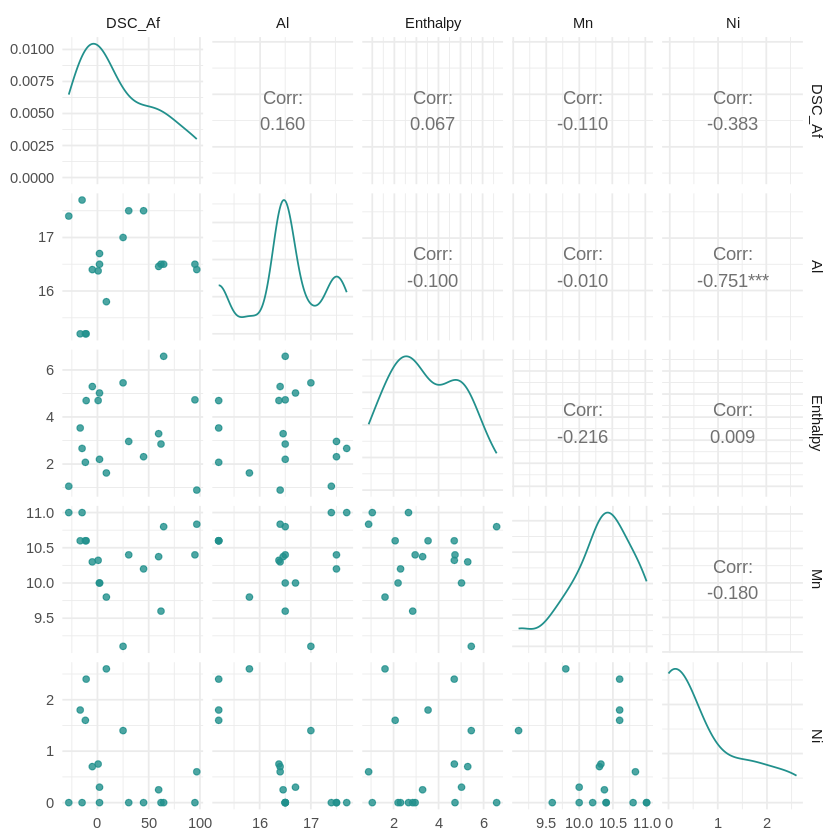

In [7]:
library(mlr3viz)
tsk <- as_task_regr(dt, target = "DSC_Af")
# tsk$data()
autoplot(tsk, type = "pairs")

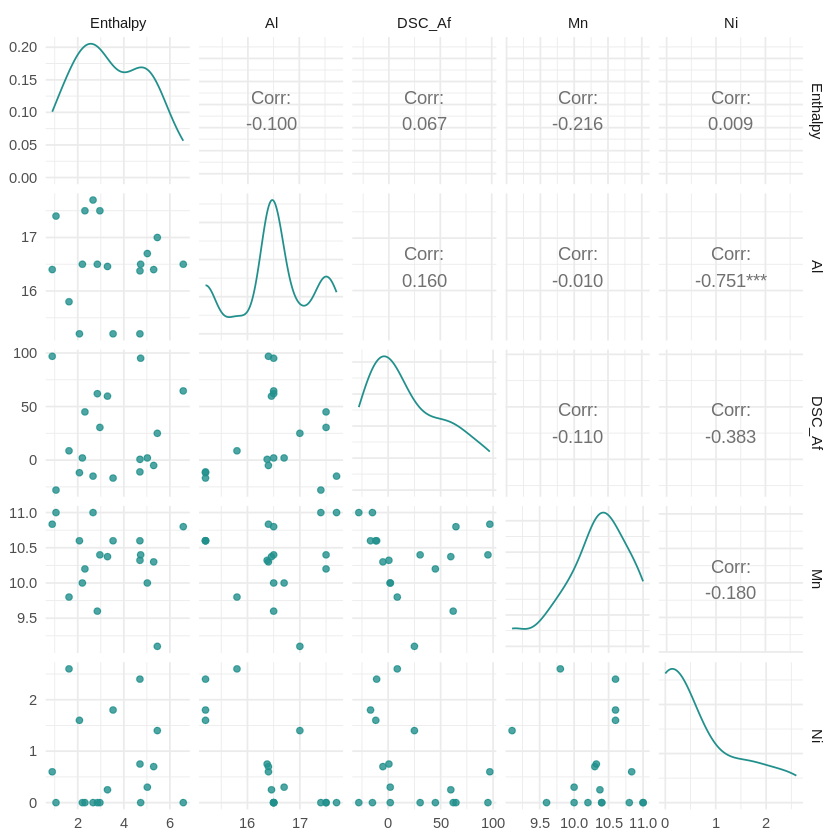

In [8]:
tsk <- as_task_regr(dt, target = "Enthalpy")
# tsk$data()
autoplot(tsk, type = "pairs")

Always a good idea to show the pair plot to have a general sense of the data distribution, and see the relationship/correlation between features and targets. `mlr3viz` package has a simple `autoplot` function that does that.

In [9]:
# Update this accordingly to run the experiment
metadata <- list(
  seed = 42,
  # The name of the bucket where the archive will be saved
  bucket_name = "my_bucket",
  user_id = "my_id",  # The user ID
  table_name = "CuAlMnNi",  # The name of the table
  batch_number = "1",  # The batch number
  parameter_info = list(
    Al = "float",  # The type of the Al parameter
    Mn = "float",  # The type of the Mn parameter
    Ni = "float"  # The type of the Ni parameter
    # Add more parameters as needed
  ),
  parameter_ranges = list(
    Al = "(14, 20)",  # The range of the Al parameter
    Mn = "(7,15)",  # The range of the Mn parameter
    Ni = "(0,5)"  # The range of the Ni parameter
    # Add more ranges as needed
  ),
  output_column_names = output_columns,  # The names of the output columns
  # Ignored from the search space, but calculated in post-processing
  calculated_column = "Cu",
  # The direction of the optimization ("minimize" or "maximize")
  directions = directions,
  num_random_lines = 10,  # The number of random lines to generate
  to_nearest = 0.2  # The value to round to
)

In [10]:
# Run the experiment function
suppressWarnings({
  result <- propose_experiment(dt, metadata)
})

[1] "Al"
[1] "float"
[1] "(14, 20)"
[1] "Mn"
[1] "float"
[1] "(7,15)"
[1] "Ni"
[1] "float"
[1] "(0,5)"
[1] "Model archive so far: "
<Archive>
       Al    Mn    Ni DSC_Af Enthalpy           timestamp batch_nr
    <num> <num> <num>  <num>    <num>              <POSc>    <int>
 1:    16   9.6  0.00  62.00     2.85 2024-03-10 23:35:06        1
 2:    18  10.2  0.00  45.00     2.31 2024-03-10 23:35:06        1
 3:    18  10.4  0.00  30.50     2.96 2024-03-10 23:35:06        1
 4:    16  10.4  0.00  95.10     4.73 2024-03-10 23:35:06        1
 5:    16  10.8  0.00  64.60     6.58 2024-03-10 23:35:06        1
 6:    16  10.8  0.60  96.90     0.89 2024-03-10 23:35:06        1
 7:    16  10.4  0.25  59.70     3.29 2024-03-10 23:35:06        1
 8:    16  10.3  0.75   0.69     4.70 2024-03-10 23:35:06        1
 9:    16  10.0  0.00   2.00     2.20 2024-03-10 23:35:06        1
10:    16  10.3  0.70  -5.00     5.29 2024-03-10 23:35:06        1
11:    18  11.0  0.00 -15.00     2.66 2024-03-10 23:35

In [11]:
result

Cu      Al      Mn      Ni   DSC_Af   Enthalpy
1  73.9000 16.5000  9.6000 0.00  62.0000 2.8500  
2  72.3000 17.5000 10.2000 0.00  45.0000 2.3100  
3  72.1000 17.5000 10.4000 0.00  30.5000 2.9600  
4  73.1000 16.5000 10.4000 0.00  95.1000 4.7300  
5  72.7000 16.5000 10.8000 0.00  64.6000 6.5800  
6  72.7644 16.4010 10.8346 0.60  96.9000 0.8920  
7  73.1672 16.4588 10.3740 0.25  59.7000 3.2900  
8  73.3017 16.3763 10.3220 0.75   0.6900 4.7000  
9  73.5000 16.5000 10.0000 0.00   2.0010 2.2000  
10 73.3000 16.4000 10.3000 0.70  -5.0030 5.2945  
11 71.3000 17.7000 11.0000 0.00 -14.9976 2.6631  
12 73.9000 17.0000  9.1000 1.40  25.0020 5.4530  
13 73.3000 16.7000 10.0000 0.30   2.0000 5.0195  
14 71.6000 17.4000 11.0000 0.00 -28.0058 1.0543  
15 74.4000 15.8000  9.8000 2.60   8.7000 1.6200  
16 74.2000 15.2000 10.6000 1.60 -11.8000 2.0720  
17 74.2000 15.2000 10.6000 1.80 -16.8000 3.5330  
18 74.2000 15.2000 10.6000 2.40 -11.0000 4.6970  
19 72.0000 17.0000 11.0000 0.00       NA     NA  
20 72.4000 16.6000 11.0000 0.20       NA     NA  
21 71.6000 17.4000 11.0000 1.40       NA     NA  
22 72.2000 16.8000 11.0000 1.20       NA     NA  
23 73.0000 16.0000 11.0000 0.00       NA     NA  
24 72.0000 17.0000 11.0000 0.20       NA     NA  
25 71.6000 17.6000 10.8000 0.00       NA     NA  
26 72.8000 16.2000 11.0000 0.00       NA     NA  
27 69.8000 19.2000 11.0000 1.60       NA     NA  
28 73.6000 16.8000  9.6000 0.40       NA     NA

In [12]:
file = 'my_bucket/my_id/CuAlMnNi/1/output.csv' # This folder my_bucket/my_id/CuAlMnNi_2/1 also contains the trained model .rds files
data <- as.data.table(read.csv(file))
data

Cu      Al      Mn      Ni   DSC_Af   Enthalpy
1  73.9000 16.5000  9.6000 0.00  62.0000 2.8500  
2  72.3000 17.5000 10.2000 0.00  45.0000 2.3100  
3  72.1000 17.5000 10.4000 0.00  30.5000 2.9600  
4  73.1000 16.5000 10.4000 0.00  95.1000 4.7300  
5  72.7000 16.5000 10.8000 0.00  64.6000 6.5800  
6  72.7644 16.4010 10.8346 0.60  96.9000 0.8920  
7  73.1672 16.4588 10.3740 0.25  59.7000 3.2900  
8  73.3017 16.3763 10.3220 0.75   0.6900 4.7000  
9  73.5000 16.5000 10.0000 0.00   2.0010 2.2000  
10 73.3000 16.4000 10.3000 0.70  -5.0030 5.2945  
11 71.3000 17.7000 11.0000 0.00 -14.9976 2.6631  
12 73.9000 17.0000  9.1000 1.40  25.0020 5.4530  
13 73.3000 16.7000 10.0000 0.30   2.0000 5.0195  
14 71.6000 17.4000 11.0000 0.00 -28.0058 1.0543  
15 74.4000 15.8000  9.8000 2.60   8.7000 1.6200  
16 74.2000 15.2000 10.6000 1.60 -11.8000 2.0720  
17 74.2000 15.2000 10.6000 1.80 -16.8000 3.5330  
18 74.2000 15.2000 10.6000 2.40 -11.0000 4.6970  
19 72.0000 17.0000 11.0000 0.00       NA     NA  
20 72.4000 16.6000 11.0000 0.20       NA     NA  
21 71.6000 17.4000 11.0000 1.40       NA     NA  
22 72.2000 16.8000 11.0000 1.20       NA     NA  
23 73.0000 16.0000 11.0000 0.00       NA     NA  
24 72.0000 17.0000 11.0000 0.20       NA     NA  
25 71.6000 17.6000 10.8000 0.00       NA     NA  
26 72.8000 16.2000 11.0000 0.00       NA     NA  
27 69.8000 19.2000 11.0000 1.60       NA     NA  
28 73.6000 16.8000  9.6000 0.40       NA     NA

In [13]:
# Update this accordingly to run the experiment
metadata <- list(
  seed = 42,
  # The name of the bucket where the archive will be saved
  bucket_name = "my_bucket",
  user_id = "my_id",  # The user ID
  table_name = "CuAlMnNi",  # The name of the table
  batch_number = "2",  # The batch number
  parameter_info = list(
    Al = "float",  # The type of the Al parameter
    Mn = "float",  # The type of the Mn parameter
    Ni = "float"  # The type of the Ni parameter
    # Add more parameters as needed
  ),
  parameter_ranges = list(
    Al = "(14, 20)",  # The range of the Al parameter
    Mn = "(7,15)",  # The range of the Mn parameter
    Ni = "(0,5)"  # The range of the Ni parameter
    # Add more ranges as needed
  ),
  output_column_names = output_columns,  # The names of the output columns
  # Ignored from the search space, but calculated in post-processing
  calculated_column = "Cu",
  # The direction of the optimization ("minimize" or "maximize")
  directions = directions,
  num_random_lines = 10,  # The number of random lines to generate
  to_nearest = 0.2  # The value to round to
)

In [15]:
# CURRENTLY DEBUGGING
# # Inspect trained model
# result <- load_archive(metadata)
# archive <- result[[1]]
# acq_function <- result[[2]]
# acq_optimizer <- result[[3]]

# # Extract our trained model
# model <- acq_function$surrogate$model$model

# # Preprocessing
# raw_data <- na.omit(data)

# # Select the predictor columns
# predictor_data <- raw_data[, c("Al", "Mn", "Ni")]

# # Select the target column
# y <- raw_data$DSC_Af

In [16]:
# install.packages(c("vctrs", "digest", "utf8","pbdZMQ","evaluate")) # update if any is missing

In [17]:
# library(iml)
# # Create a Predictor object with the model and the data frame
# predictor <- Predictor$new(model, data = predictor_data, y = y)

# # Compute feature importance
# importance <- FeatureImp$new(predictor, loss = "mse", n.repetitions = 100)

# # Plot the feature importance
# importance$plot()

The plot automatically ranks features from most (largest median performance change) to least (smallest median performance change) important. Here Al is most important. Cu is calculated and not included in the ML model, therefore we're not expecting any predictions throughout the study.

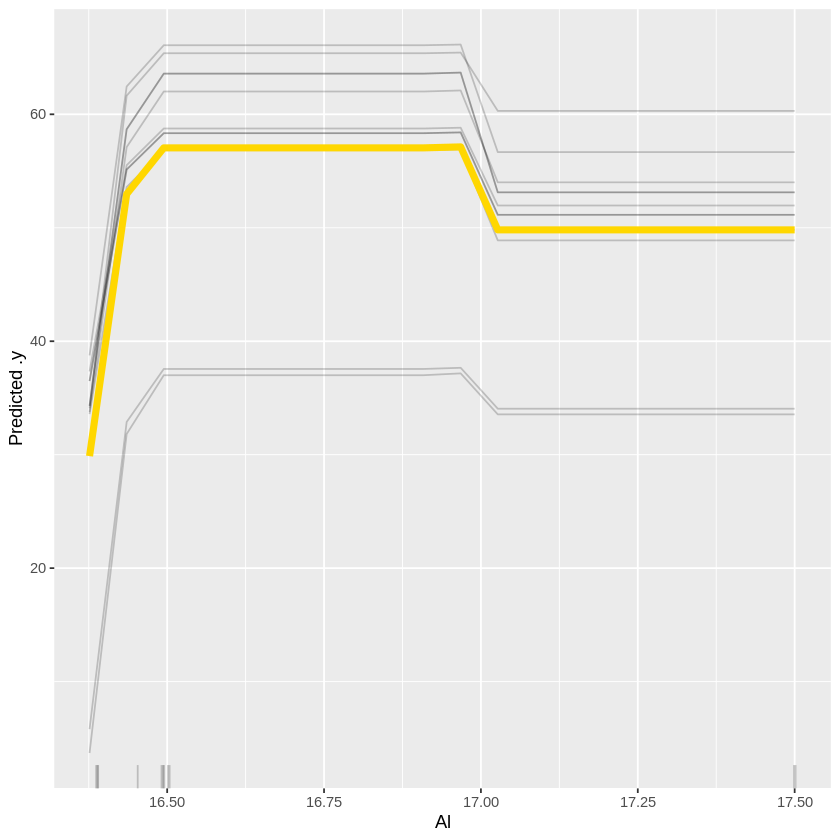

In [ ]:
Al_effect <- FeatureEffect$new(predictor, feature = "Al",
                               method = "pdp+ice")
Al_effect$plot()

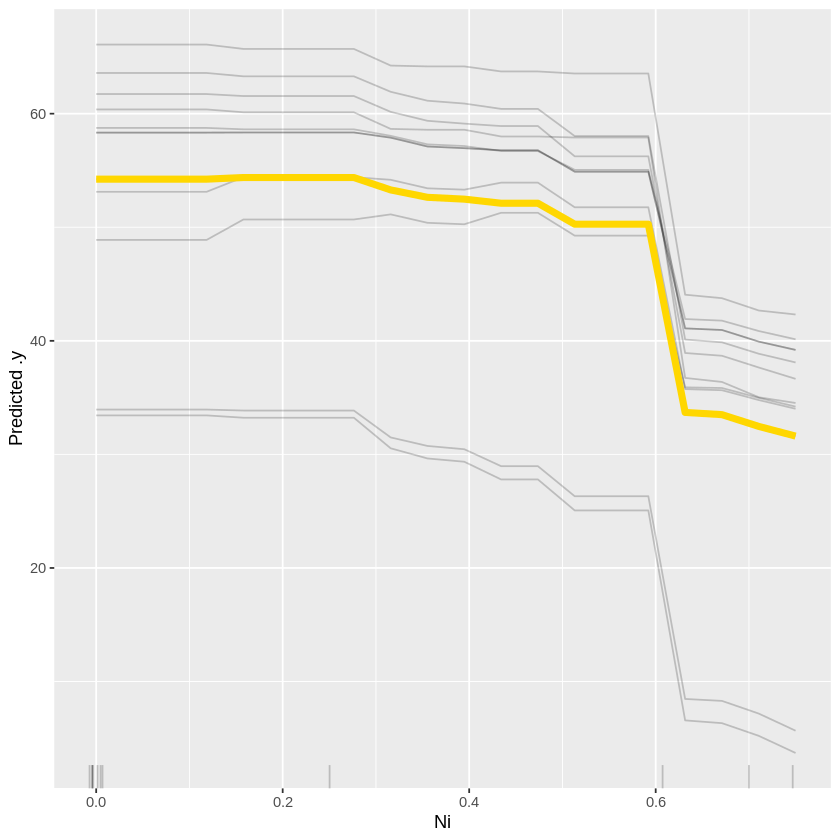

In [ ]:
Ni_effect <- FeatureEffect$new(predictor, feature = "Ni",
                               method = "pdp+ice")
Ni_effect$plot()

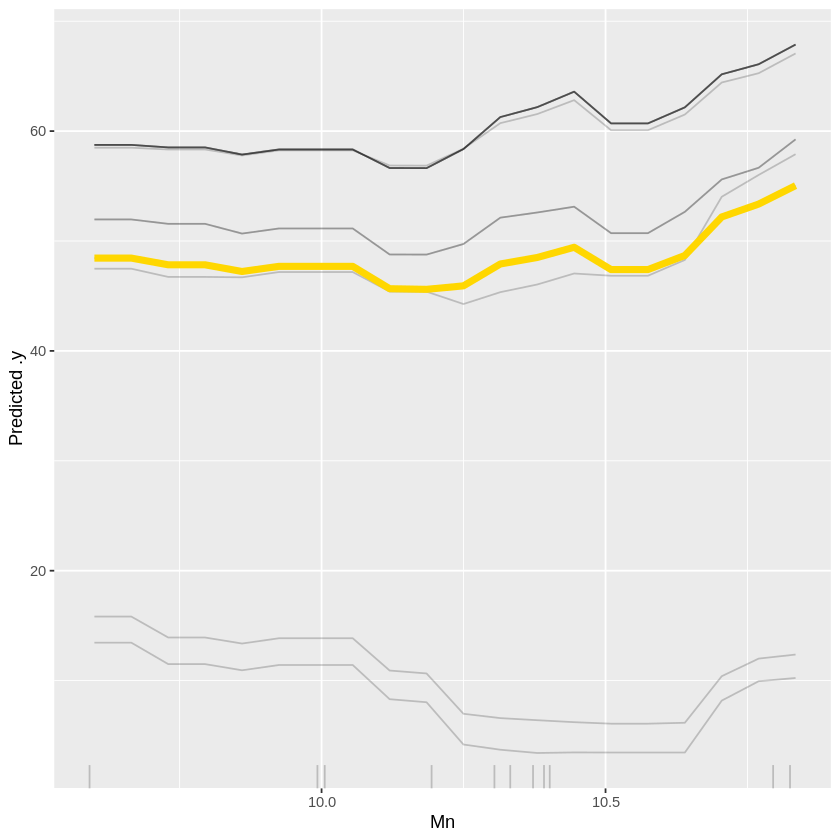

In [ ]:
Mn_effect <- FeatureEffect$new(predictor, feature = "Mn",
                               method = "pdp+ice")
Mn_effect$plot()



We recommend always plotting partial dependence (PD, yellow) and individual conditional expectation (ICE, grey) curves together as PD plots on their own could mask heterogeneous effects. PD visualize global feature effects by visualizing how model predictions change on average when varying the values of a given feature of interest. ICE show local feature effects method that display how the prediction of a single observation changes when varying a feature of interest, while all other features stay constant. PD plot is the average of ICE curves.

If the ICE curves are heterogeneous, i.e., not parallel, then the model may have estimated an interaction involving the considered feature. For example, in the Mn plot, there are a few grey curves that do not follow the overall trend. This may indicate interaction between the features, but they seem insignificant for now. Having more data would help improve statistics to determine the validity of such interactions.


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


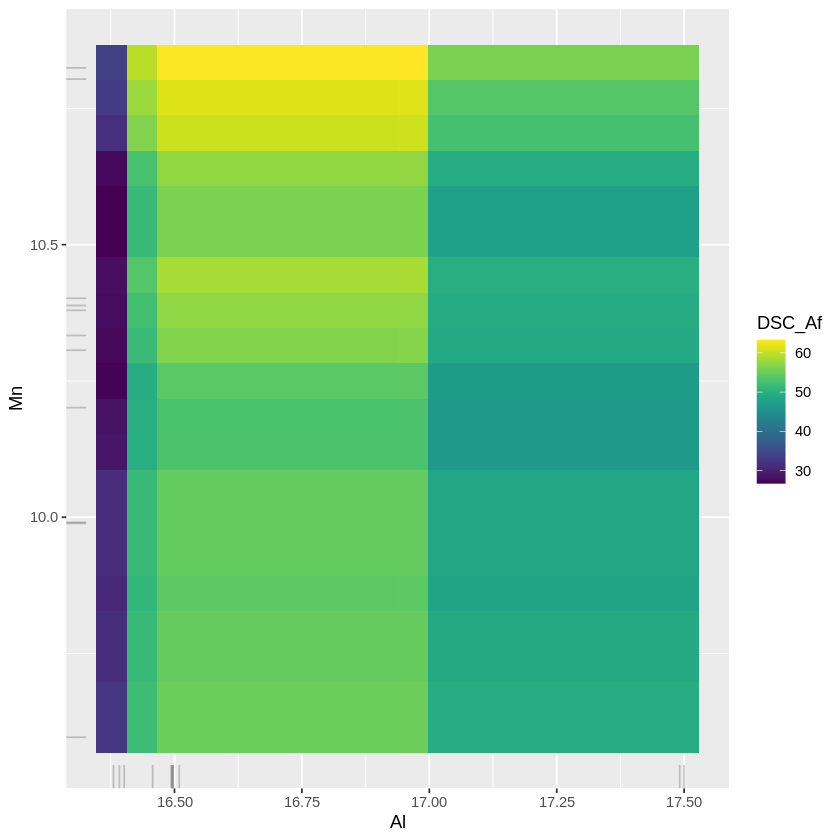

In [ ]:
# install.packages("viridis")
library(viridis)
# R
# Generate the 2-way partial dependence plot
pd <- FeatureEffect$new(predictor, c("Al", "Mn"), method = "pdp")
p <- pd$plot() +
  scale_fill_viridis(option = "D")

# Change the color bar title
p <- p + labs(fill = "DSC_Af")

# Print the plot
print(p)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


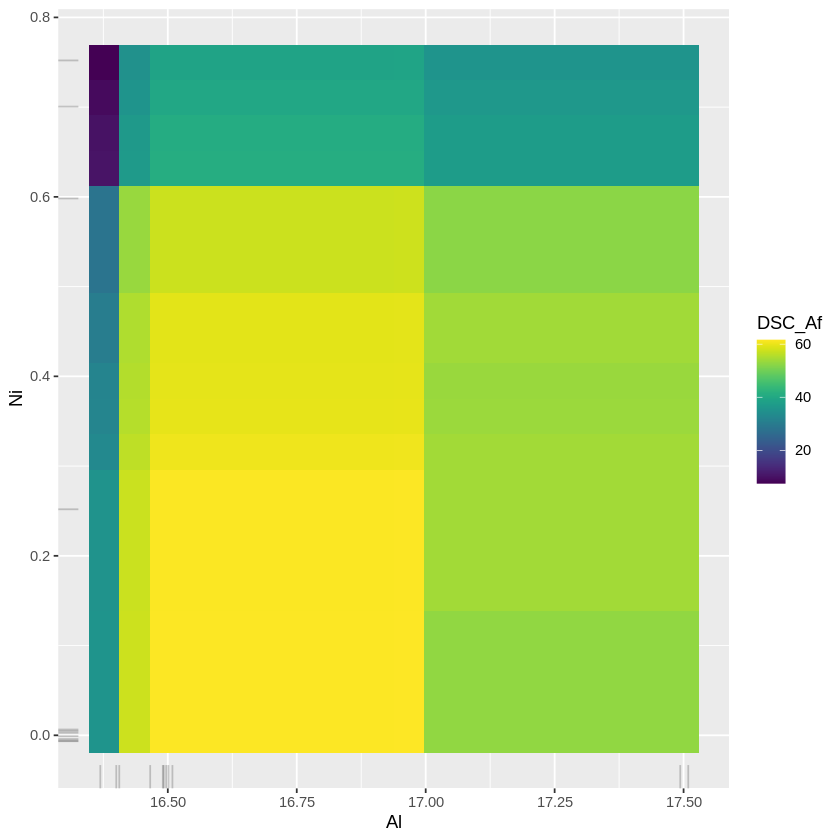

In [ ]:
# install.packages("viridis")
library(viridis)
# R
# Generate the 2-way partial dependence plot
pd <- FeatureEffect$new(predictor, c("Al", "Ni"), method = "pdp")
p <- pd$plot() +
  scale_fill_viridis(option = "D")

# Change the color bar title
p <- p + labs(fill = "DSC_Af")

# Print the plot
print(p)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


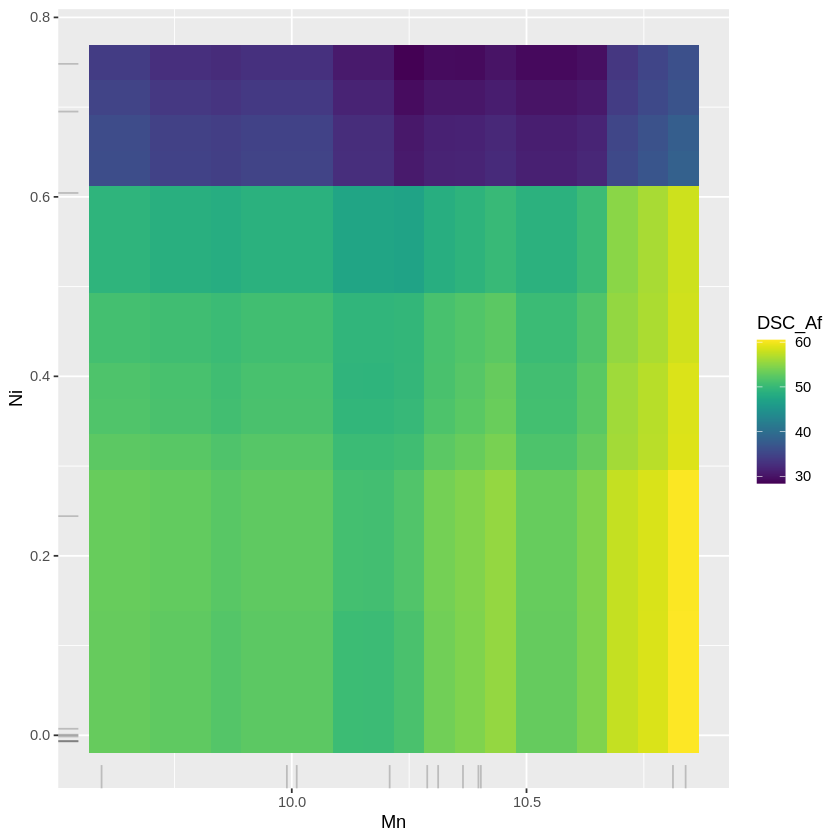

In [ ]:
# install.packages("viridis")
library(viridis)
# R
# Generate the 2-way partial dependence plot
pd <- FeatureEffect$new(predictor, c("Mn", "Ni"), method = "pdp")
p <- pd$plot() +
  scale_fill_viridis(option = "D")

# Change the color bar title
p <- p + labs(fill = "DSC_Af")

# Print the plot
print(p)



We can also visualize the partial dependence of two features at once. From the PDP map, one may deduce decrease in the DSC_Af around the low Al, high Ni regions, but Mn doesn't seem to contribute much.

But be careful when drawing conclusions: This might just be a correlation and not causal! The assumption of independence is the biggest issue with PD plots. It is assumed that the feature(s) for which the partial dependence is computed are not correlated with other features. For example, suppose you want to predict how fast a person walks, given the person’s weight and height. For the partial dependence of one of the features, e.g. height, we assume that the other features (weight) are not correlated with height, which is obviously a false assumption. For the computation of the PDP at a certain height (e.g. 200 cm), we average over the marginal distribution of weight, which might include a weight below 50 kg, which is unrealistic for a 2 meter person. In other words: When the features are correlated, we create new data points in areas of the feature distribution where the actual probability is very low (for example it is unlikely that someone is 2 meters tall but weighs less than 50 kg)

If there are interactions, there are other solutions we can go try, for example, [accumulated local effects](https://christophm.github.io/interpretable-ml-book/ale.html#ale)


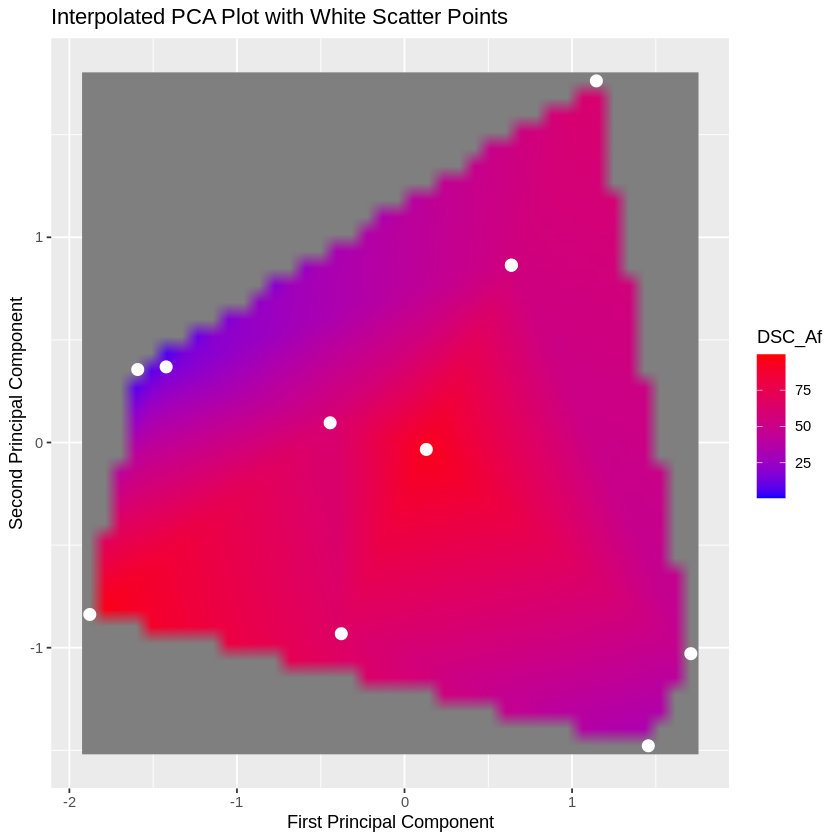

In [ ]:
library(ggplot2)
# Perform PCA
pca_result <- prcomp(predictor_data, scale. = TRUE)

# Create a data frame of the first two principal components
pca_data <- data.frame(pca_result$x[,1:2])

# Add the 'Average' column to the PCA data
pca_data$DSC_Af <- y


# Install and load the akima package
if (!require(akima)) {
  install.packages("akima")
}
library(akima)

# Perform interpolation,  duplicate data are averaged, use "strip" to only use first occurance
interp_data <- with(pca_data, interp(x = PC1, y = PC2, z = DSC_Af, duplicate = "mean"))

# Convert the interpolated data to a data frame
interp_df <- data.frame(
  expand.grid(PC1 = interp_data$x, PC2 = interp_data$y),
  DSC_Af = c(interp_data$z)
)

# Create the plot
ggplot(interp_df, aes(x = PC1, y = PC2, fill = DSC_Af)) +
  geom_raster(interpolate = TRUE) +
  scale_fill_gradient(low = "blue", high = "red") +
  geom_point(data = pca_data, color = "white", size = 3) +
  xlab("First Principal Component") +
  ylab("Second Principal Component") +
  ggtitle("Interpolated PCA Plot with White Scatter Points")

This is another way of visualizing multi-dimensions in 2-dimensions. But one could also apply principle component analysis for dimensionality reduction or just to find patterns in the feature space. This is different than partial dependence which actually interprets the effects of features in the trained ML model (note the axis labels in both plots).

# UPDATE EXPERIMENT
The following assumes you have ran the batch of experiments and filled up the output file.
I have re-uploaded this file as `updated.csv` that contains (hypothetical) measured values.

In [18]:
# Import functions (see https://github.com/hududed/mlr3mbo-demo.git for the source files)
# FOR UPDATES MAKE SURE THIS IS SOURCED, NOT mlr3mbo-demo/utils/batch.R!
source("mlr3mbo-demo/utils/update.R")

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked _by_ ‘.GlobalEnv’:

    capitalize


The following object is masked from ‘package:mlr3’:

    resample


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [19]:
# Please upload the new updated file in your session (See Folder icon on the left pane)
file = 'updated.csv' # This is uploaded to root directory (same level as my_bucket and mlr3mbo-demo folders), feel free to set your own paths here
data <- as.data.table(read.csv(file))
data

Cu      Al      Mn      Ni   DSC_Af   Enthalpy
1  73.9000 16.5000  9.6000 0.00  62.0000 2.8500  
2  72.3000 17.5000 10.2000 0.00  45.0000 2.3100  
3  72.1000 17.5000 10.4000 0.00  30.5000 2.9600  
4  73.1000 16.5000 10.4000 0.00  95.1000 4.7300  
5  72.7000 16.5000 10.8000 0.00  64.6000 6.5800  
6  72.7644 16.4010 10.8346 0.60  96.9000 0.8920  
7  73.1672 16.4588 10.3740 0.25  59.7000 3.2900  
8  73.3017 16.3763 10.3220 0.75   0.6900 4.7000  
9  73.5000 16.5000 10.0000 0.00   2.0010 2.2000  
10 73.3000 16.4000 10.3000 0.70  -5.0030 5.2945  
11 71.3000 17.7000 11.0000 0.00 -14.9976 2.6631  
12 73.9000 17.0000  9.1000 1.40  25.0020 5.4530  
13 73.3000 16.7000 10.0000 0.30   2.0000 5.0195  
14 71.6000 17.4000 11.0000 0.00 -28.0058 1.0543  
15 74.4000 15.8000  9.8000 2.60   8.7000 1.6200  
16 74.2000 15.2000 10.6000 1.60 -11.8000 2.0720  
17 74.2000 15.2000 10.6000 1.80 -16.8000 3.5330  
18 74.2000 15.2000 10.6000 2.40 -11.0000 4.6970  
19 72.0000 17.0000 11.0000 0.00  -5.0030 5.2945  
20 72.4000 16.6000 11.0000 0.20 -14.9976 2.6631  
21 71.6000 17.4000 11.0000 1.40  25.0020 5.4530  
22 72.2000 16.8000 11.0000 1.20   2.0000 5.0195  
23 73.0000 16.0000 11.0000 0.00 -28.0058 1.0543  
24 72.0000 17.0000 11.0000 0.20   8.7000 1.6200  
25 71.6000 17.6000 10.8000 0.00 -11.8000 2.0720  
26 72.8000 16.2000 11.0000 0.00 -16.8000 3.5330  
27 69.8000 19.2000 11.0000 1.60 -11.0000 4.6970  
28 73.6000 16.8000  9.6000 0.40   0.1000 0.2000

In [21]:
# Update this accordingly to run the experiment
metadata <- list(
  seed = 42,
  # The name of the bucket where the archive will be saved
  bucket_name = "my_bucket",
  user_id = "my_id",  # The user ID
  table_name = "CuAlMnNi",  # The name of the table
  batch_number = "2",  # The batch number
  parameter_info = list(
    Al = "float",  # The type of the Al parameter
    Mn = "float",  # The type of the Mn parameter
    Ni = "float"  # The type of the Ni parameter
    # Add more parameters as needed
  ),
  parameter_ranges = list(
    Al = "(14, 20)",  # The range of the Al parameter
    Mn = "(7,15)",  # The range of the Mn parameter
    Ni = "(0,5)"  # The range of the Ni parameter
    # Add more ranges as needed
  ),
  output_column_names = output_columns,  # The names of the output columns
  # Ignored from the search space, but calculated in post-processing
  calculated_column = "Cu",
  # The direction of the optimization ("minimize" or "maximize")
  directions = directions,
  num_random_lines = 10,  # The number of random lines to generate
  to_nearest = 0.2  # The value to round to
)

In [22]:
# Run the experiment (FOR UPDATES MAKE SURE mlr3mbo-demo/utils/update.R is sourced, not batch.R)
result <- update_experiment(data, metadata)

       Cu    Al    Mn    Ni   DSC_Af Enthalpy
    <num> <num> <num> <num>    <num>    <num>
 1:  72.0  17.0  11.0   0.0  -5.0030   5.2945
 2:  72.4  16.6  11.0   0.2 -14.9976   2.6631
 3:  71.6  17.4  11.0   1.4  25.0020   5.4530
 4:  72.2  16.8  11.0   1.2   2.0000   5.0195
 5:  73.0  16.0  11.0   0.0 -28.0058   1.0543
 6:  72.0  17.0  11.0   0.2   8.7000   1.6200
 7:  71.6  17.6  10.8   0.0 -11.8000   2.0720
 8:  72.8  16.2  11.0   0.0 -16.8000   3.5330
 9:  69.8  19.2  11.0   1.6 -11.0000   4.6970
10:  73.6  16.8   9.6   0.4   0.1000   0.2000
[1] "Model archive so far: "
<Archive>
       Al    Mn    Ni DSC_Af Enthalpy           timestamp batch_nr
    <num> <num> <num>  <num>    <num>              <POSc>    <int>
 1:    16   9.6  0.00  62.00     2.85 2024-03-10 23:35:06        1
 2:    18  10.2  0.00  45.00     2.31 2024-03-10 23:35:06        1
 3:    18  10.4  0.00  30.50     2.96 2024-03-10 23:35:06        1
 4:    16  10.4  0.00  95.10     4.73 2024-03-10 23:35:06        1
 5:    

Warning message in (function (fn, nvars, max = FALSE, pop.size = 1000, max.generations = 100, :
“Stopped because hard maximum generation limit was hit.”
Warning message in (function (fn, nvars, max = FALSE, pop.size = 1000, max.generations = 100, :
“Stopped because hard maximum generation limit was hit.”
Warning message in (function (fn, nvars, max = FALSE, pop.size = 1000, max.generations = 100, :
“Stopped because hard maximum generation limit was hit.”
Warning message in (function (fn, nvars, max = FALSE, pop.size = 1000, max.generations = 100, :
“Stopped because hard maximum generation limit was hit.”
Warning message in (function (fn, nvars, max = FALSE, pop.size = 1000, max.generations = 100, :
“Stopped because hard maximum generation limit was hit.”
Warning message in (function (fn, nvars, max = FALSE, pop.size = 1000, max.generations = 100, :
“Stopped because hard maximum generation limit was hit.”


[1] "RDS files saved in directory: my_bucket/my_id/CuAlMnNi/2"
[[1]]
       Al    Mn    Ni  x_domain acq_ehvi .already_evaluated
    <num> <num> <num>    <list>    <num>             <lgcl>
 1:  19.0  11.0   2.6 <list[3]>     34.2              FALSE
 2:  18.0  10.8   0.6 <list[3]>     41.0              FALSE
 3:  19.8  11.0   2.6 <list[3]>     30.6              FALSE
 4:  19.4  11.0   3.6 <list[3]>     28.2              FALSE
 5:  15.4  10.6   2.0 <list[3]>     33.0              FALSE
 6:  15.4  11.0   1.0 <list[3]>     28.4              FALSE
 7:  19.8  11.0   2.4 <list[3]>     30.6              FALSE
 8:  17.8  10.8   0.8 <list[3]>     32.8              FALSE
 9:  15.4  11.0   1.4 <list[3]>     30.2              FALSE
10:  18.6  10.8   0.4 <list[3]>     33.6              FALSE

[[2]]
<Archive>
       Al    Mn    Ni DSC_Af Enthalpy           timestamp batch_nr
    <num> <num> <num>  <num>    <num>              <POSc>    <int>
 1:    16   9.6  0.00  62.00     2.85 2024-03-10 23:35:06   

In [23]:
file = 'my_bucket/my_id/CuAlMnNi/2/output.csv'
data <- as.data.table(read.csv(file))
data

Cu      Al      Mn      Ni   DSC_Af   Enthalpy
1  73.9000 16.5000  9.6000 0.00  62.0000 2.8500  
2  72.3000 17.5000 10.2000 0.00  45.0000 2.3100  
3  72.1000 17.5000 10.4000 0.00  30.5000 2.9600  
4  73.1000 16.5000 10.4000 0.00  95.1000 4.7300  
5  72.7000 16.5000 10.8000 0.00  64.6000 6.5800  
6  72.7644 16.4010 10.8346 0.60  96.9000 0.8920  
7  73.1672 16.4588 10.3740 0.25  59.7000 3.2900  
8  73.3017 16.3763 10.3220 0.75   0.6900 4.7000  
9  73.5000 16.5000 10.0000 0.00   2.0010 2.2000  
10 73.3000 16.4000 10.3000 0.70  -5.0030 5.2945  
11 71.3000 17.7000 11.0000 0.00 -14.9976 2.6631  
12 73.9000 17.0000  9.1000 1.40  25.0020 5.4530  
13 73.3000 16.7000 10.0000 0.30   2.0000 5.0195  
14 71.6000 17.4000 11.0000 0.00 -28.0058 1.0543  
15 74.4000 15.8000  9.8000 2.60   8.7000 1.6200  
16 74.2000 15.2000 10.6000 1.60 -11.8000 2.0720  
17 74.2000 15.2000 10.6000 1.80 -16.8000 3.5330  
18 74.2000 15.2000 10.6000 2.40 -11.0000 4.6970  
19 72.0000 17.0000 11.0000 0.00  -5.0030 5.2945  
20 72.4000 16.6000 11.0000 0.20 -14.9976 2.6631  
21 71.6000 17.4000 11.0000 1.40  25.0020 5.4530  
22 72.2000 16.8000 11.0000 1.20   2.0000 5.0195  
23 73.0000 16.0000 11.0000 0.00 -28.0058 1.0543  
24 72.0000 17.0000 11.0000 0.20   8.7000 1.6200  
25 71.6000 17.6000 10.8000 0.00 -11.8000 2.0720  
26 72.8000 16.2000 11.0000 0.00 -16.8000 3.5330  
27 69.8000 19.2000 11.0000 1.60 -11.0000 4.6970  
28 73.6000 16.8000  9.6000 0.40   0.1000 0.2000  
29 67.4000 19.0000 11.0000 2.60       NA     NA  
30 70.6000 18.0000 10.8000 0.60       NA     NA  
31 66.6000 19.8000 11.0000 2.60       NA     NA  
32 66.0000 19.4000 11.0000 3.60       NA     NA  
33 72.0000 15.4000 10.6000 2.00       NA     NA  
34 72.6000 15.4000 11.0000 1.00       NA     NA  
35 66.8000 19.8000 11.0000 2.40       NA     NA  
36 70.6000 17.8000 10.8000 0.80       NA     NA  
37 72.2000 15.4000 11.0000 1.40       NA     NA  
38 70.2000 18.6000 10.8000 0.40       NA     NA